In [1]:
# # Run this and then restart the kernel at the start of each session to install
# # 'teotil3' in development mode
# !pip install -e /home/jovyan/projects/teotil3/

In [2]:
import os
import pprint as pp

import aquamonitor as am
import geopandas as gpd
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import numpy as np
import pandas as pd
import rioxarray as rio
import seaborn as sn
import teotil3 as teo
import xarray as xr
from rasterstats import zonal_stats
from shapely.geometry import Point
from tqdm.notebook import tqdm

plt.style.use("ggplot")

# Task 2.15: Testing, documentation and reporting

## Part I: Referanseelver

In [3]:
eng = nivapy.da.connect_postgis()

Connection successful.


In [4]:
# Login to AM
token = am.login()

Please enter your credentials.


Username:  ········
Password:  ········


In [5]:
proj_df = am.get_projects(token=token)
proj_df.query(
    "project_name.str.contains('Overvåking av referanseelver')", engine="python"
)

,project_id,project_code,project_name,description
1045,11226,"17201,17370,210000",Overvåking av referanseelver,Overvåking av referanseelver


In [6]:
# Project of interest
proj_id = 11226

stn_df = am.get_project_stations(proj_id, token=token, return_coords=True)
print(f"{len(stn_df)} stations in project.")

# Assign to regines
reg_gdf = teo.io.get_regine_geodataframe(eng, 2022)
stn_df = nivapy.spatial.identify_point_in_polygon(
    stn_df,
    reg_gdf,
    pt_col="station_id",
    poly_col="regine",
    lat_col="latitude",
    lon_col="longitude",
)

stn_df.head()

125 stations in project.                        


,project_id,station_id,station_code,station_name,type,longitude,latitude,regine
0,11226,57696,ESJ SJO1,Sjoa 1,Elv,9.528430,61.680393,002.DGA20
1,11226,66477,O_002-1869_Dor,"Døråe, DAN02",Elv,9.806361,61.994952,002.LG
2,11226,66478,O_002-300_Atn_DAN03,"Atna v/ Elgvassli, DAN03",Elv,10.013652,62.008622,002.LG
3,11226,66479,O_002-305_Atn_DAN04,"Atna nedstrøms Atnasjøen, DAN04",Elv,10.226869,61.852142,002.LD
4,11226,66481,DAN A06,Setninga før Atna,Elv,10.466096,61.786960,002.LBZ


In [7]:
nivapy.spatial.quickmap(stn_df, cluster=True, popup="station_code", aerial_imagery=True)

In [8]:
# Derive catchment boundaries
stn_gdf = nivapy.spatial.derive_watershed_boundaries(
    stn_df,
    id_col="station_id",
    xcol="longitude",
    ycol="latitude",
    crs="epsg:4326",
    min_size_km2=2,
    dem_res_m=40,
    buffer_km=None,
    temp_fold=None,
    reproject=False,
)
stn_gdf["catch_area_km2"] = stn_gdf.to_crs({"proj": "cea"}).geometry.area / 1e6

Connection successful.


Looping over vassdragsområder:   0%|          | 0/48 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 002:   0%|          | 0/20 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 008:   0%|          | 0/7 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 012:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 015:   0%|          | 0/3 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 016:   0%|          | 0/2 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 017:   0%|          | 0/3 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 019:   0%|          | 0/3 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 020:   0%|          | 0/2 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 021:   0%|          | 0/6 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 024:   0%|          | 0/7 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 025:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 026:   0%|          | 0/3 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 027:   0%|          | 0/14 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 035:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 048:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 050:   0%|          | 0/2 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 053:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 062:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 072:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 073:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 074:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 077:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 082:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 094:   0%|          | 0/2 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 105:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 109:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 120:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 123:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 128:   0%|          | 0/6 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 139:   0%|          | 0/4 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 142:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 151:   0%|          | 0/3 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 161:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 177:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 195:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 196:   0%|          | 0/2 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 197:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 198:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 206:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 212:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 213:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 221:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 223:   0%|          | 0/3 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 225:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 234:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 238:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 239:   0%|          | 0/2 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 246:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
data_fold = f"/home/jovyan/shared/common/teotil3/core_data"
ar50_gdb = os.path.join(data_fold, "land_cover", "nibio_ar50.gdb")
ar50_gdf = gpd.read_file(ar50_gdb, driver="fileGDB", layer="org_ar_ar50_flate")

In [10]:
def calculate_ar50_land_cover_proportions(
    gdf,
    ar50_gdf,
    land_class_csv=r"https://raw.githubusercontent.com/NIVANorge/teotil3/main/data/ar50_artype_classes.csv",
):
    """ """
    gdf = gdf.copy()

    print("Reclassifying...")
    artype_df = pd.read_csv(land_class_csv)
    ar50_gdf = pd.merge(ar50_gdf, artype_df, how="left", on="artype")
    ar50_gdf = ar50_gdf[["teotil", "geometry"]]

    print("Reprojecting to equal area...")
    gdf_cea = gdf.to_crs({"proj": "cea"})
    ar50_gdf_cea = ar50_gdf.to_crs({"proj": "cea"})

    print("Intersecting polygons...")
    int_gdf = gpd.overlay(
        gdf_cea, ar50_gdf_cea, how="intersection", keep_geom_type=True
    )
    int_gdf["area_km2"] = int_gdf["geometry"].area / 1e6

    print("Aggregating...")
    lc_df = int_gdf.groupby(["station_id", "teotil"]).sum(numeric_only=True)["area_km2"]
    lc_df = lc_df.unstack("teotil")
    lc_df.columns = [f"a_{i}_km2" for i in lc_df.columns]
    lc_df.reset_index(inplace=True)
    lc_df.columns.name = ""
    gdf = pd.merge(gdf, lc_df, on="station_id", how="left")
    cols = [
        "a_agri_km2",
        "a_glacier_km2",
        "a_lake_km2",
        "a_sea_km2",
        "a_upland_km2",
        "a_urban_km2",
        "a_wood_km2",
    ]
    for col in cols:
        gdf[col].fillna(0, inplace=True)

    # Some regines lie wholly or partially outside Norway/AR50. These parts should
    # be considered 100% 'other'
    gdf["a_other_km2"] = (
        gdf["catch_area_km2"]
        - gdf["a_agri_km2"]
        - gdf["a_glacier_km2"]
        - gdf["a_lake_km2"]
        - gdf["a_sea_km2"]
        - gdf["a_upland_km2"]
        - gdf["a_urban_km2"]
        - gdf["a_wood_km2"]
    ).clip(lower=0)

    # Sum the total AR50 area for classes that are not 'sea' or 'other'
    gdf["ar50_tot_a_km2"] = (
        gdf["a_agri_km2"]
        + gdf["a_glacier_km2"]
        + gdf["a_lake_km2"]
        + gdf["a_upland_km2"]
        + gdf["a_urban_km2"]
        + gdf["a_wood_km2"]
    )

    # Calculate land area for each regine
    gdf["a_cat_land_km2"] = gdf["catch_area_km2"] - gdf["a_sea_km2"]

    # Move 'geometry' to end
    cols = gdf.columns.tolist()
    cols.remove("geometry")
    cols.append("geometry")
    gdf = gdf[cols]

    return gdf


stn_gdf = calculate_ar50_land_cover_proportions(
    stn_gdf,
    ar50_gdf,
    land_class_csv=r"https://raw.githubusercontent.com/NIVANorge/teotil3/main/data/ar50_artype_classes.csv",
)

Reclassifying...
Reprojecting to equal area...
Intersecting polygons...
Aggregating...


In [11]:
ds_path = r"/home/jovyan/shared/common/teotil3/spatially_interpolated_background_coefficients.nc"
ds = xr.open_dataset(ds_path)
ds

<xarray.Dataset>
Dimensions:          (y: 1519, x: 1230)
Coordinates:
  * x                (x) float64 -8.95e+04 -8.85e+04 ... 1.138e+06 1.14e+06
  * y                (y) float64 7.95e+06 7.95e+06 ... 6.434e+06 6.432e+06
Data variables:
    Skog_DIN_µgpl    (y, x) float64 ...
    Skog_TOTN_µgpl   (y, x) float64 ...
    Skog_TDP_µgpl    (y, x) float64 ...
    Skog_TOTP_µgpl   (y, x) float64 ...
    Skog_TOC_mgpl    (y, x) float64 ...
    Fjell_DIN_µgpl   (y, x) float64 ...
    Fjell_TOTN_µgpl  (y, x) float64 ...
    Fjell_TDP_µgpl   (y, x) float64 ...
    Fjell_TOTP_µgpl  (y, x) float64 ...
    Fjell_TOC_mgpl   (y, x) float64 ...
    spatial_ref      int64 ...
Attributes:
    metadata:  Generated by Chain(steps=[('reduce',\n              BlockReduc...

In [12]:
ndv = -9999
stats = [
    "mean",
]
pars = [
    "DIN_µgpl",
    "TOTN_µgpl",
    "TDP_µgpl",
    "TOTP_µgpl",
    "TOC_mgpl",
]
for lc_class in ["Skog", "Fjell"]:
    for par in pars:
        print(lc_class, par)

        da = ds[f"{lc_class}_{par}"]
        da = da.fillna(ndv)
        da.rio.write_nodata(ndv, inplace=True)
        da.rio.to_raster(
            "temp.tif",
            compress="lzw",
        )

        stats_df = pd.DataFrame(
            zonal_stats(
                vectors=stn_gdf,
                raster="temp.tif",
                stats=stats,
                all_touched=True,
            )
        )
        stn_gdf[f"{lc_class}_{par}"] = stats_df["mean"].round(1)

os.remove("temp.tif")

# Calculate derived pars
for lc_class in ["Skog", "Fjell"]:
    stn_gdf[f"{lc_class}_TON_µgpl"] = (
        stn_gdf[f"{lc_class}_TOTN_µgpl"] - stn_gdf[f"{lc_class}_DIN_µgpl"]
    )
    stn_gdf[f"{lc_class}_TPP_µgpl"] = (
        stn_gdf[f"{lc_class}_TOTP_µgpl"] - stn_gdf[f"{lc_class}_TDP_µgpl"]
    )

# Rename cols for compatibility with rest of workflow
for col in stn_gdf.columns:
    new_col = col.lower()
    if new_col.startswith("skog"):
        new_col = new_col.replace("skog", "wood")
    if new_col.startswith("fjell"):
        new_col = new_col.replace("fjell", "upland")
    stn_gdf.rename({col: new_col}, axis="columns", inplace=True)

stn_gdf

Skog DIN_µgpl
Skog TOTN_µgpl
Skog TDP_µgpl
Skog TOTP_µgpl
Skog TOC_mgpl
Fjell DIN_µgpl
Fjell TOTN_µgpl
Fjell TDP_µgpl
Fjell TOTP_µgpl
Fjell TOC_mgpl


,station_id,project_id,station_code,station_name,type,longitude,latitude,regine,catch_area_km2,a_agri_km2,...,wood_toc_mgpl,upland_din_µgpl,upland_totn_µgpl,upland_tdp_µgpl,upland_totp_µgpl,upland_toc_mgpl,wood_ton_µgpl,wood_tpp_µgpl,upland_ton_µgpl,upland_tpp_µgpl
0,57696,11226,ESJ SJO1,Sjoa 1,Elv,9.528430,61.680393,002.DGA20,1527.875172,29.635724,...,3.9,28.2,113.2,1.6,4.8,1.0,215.9,5.8,85.0,3.2
1,66477,11226,O_002-1869_Dor,"Døråe, DAN02",Elv,9.806361,61.994952,002.LG,83.910475,0.000000,...,4.2,23.0,152.8,1.9,6.8,1.7,231.2,6.6,129.8,4.9
2,66478,11226,O_002-300_Atn_DAN03,"Atna v/ Elgvassli, DAN03",Elv,10.013652,62.008622,002.LG,163.393824,0.712297,...,4.3,22.4,158.8,1.9,7.0,2.0,232.0,6.6,136.4,5.1
3,66479,11226,O_002-305_Atn_DAN04,"Atna nedstrøms Atnasjøen, DAN04",Elv,10.226869,61.852142,002.LD,461.440213,2.279983,...,4.4,21.2,163.4,1.9,7.4,2.3,232.6,6.8,142.2,5.5
4,66481,11226,DAN A06,Setninga før Atna,Elv,10.466096,61.786960,002.LBZ,250.154174,1.515872,...,4.8,22.1,175.3,2.0,8.4,3.2,231.9,7.3,153.2,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,73993,11226,F_246-15_Sam_fisk2,"Sametielva, fiskestasjon 2 (midtre)",Elv,29.703760,69.448470,246.CA1,189.479218,0.000000,...,3.5,26.7,160.9,1.8,6.7,3.7,269.6,8.1,134.2,4.9
121,73994,11226,F_223-103_Sta_fisk2,"Stabburselva, fiskestasjon 2 (midtre)",Elv,24.849910,70.173850,223.A2,1058.124522,0.000000,...,7.9,14.3,197.6,1.6,5.0,3.8,293.8,6.3,183.3,3.4
122,73995,11226,F_223-103_Sta_fisk1,"Stabburselva, fiskestasjon 1 (øvre)",Elv,24.774290,70.148830,223.A2,1048.030079,0.000000,...,8.0,14.3,198.1,1.6,5.0,3.8,294.0,6.3,183.8,3.4
123,74228,11226,V_027-139_Hal_b,Hålandselva bunndyr & begroing,Innsjø,6.059451,58.427106,027.2,3.929081,0.419927,...,6.7,130.8,265.6,1.3,3.5,4.5,178.1,3.2,134.8,2.2


In [13]:
stn_gdf["a_anth_pct"] = (
    100 * (stn_gdf["a_agri_km2"] + stn_gdf["a_urban_km2"]) / stn_gdf["a_cat_land_km2"]
)
stn_gdf["a_lake_pct"] = 100 * stn_gdf["a_lake_km2"] / stn_gdf["a_cat_land_km2"]

In [14]:
stn_gdf = stn_gdf.query("(a_anth_pct < 1) and (a_lake_pct < 10)").copy()

for par_unit in pars:
    par, unit = par_unit.split("_")
    stn_gdf[par_unit] = (
        (stn_gdf["a_upland_km2"] * stn_gdf[f"upland_{par.lower()}_{unit}"])
        + (stn_gdf["a_wood_km2"] * stn_gdf[f"wood_{par.lower()}_{unit}"])
    ) / (stn_gdf["a_upland_km2"] + stn_gdf["a_wood_km2"])

mod_df = stn_gdf[['station_id'] + pars].copy()

mod_df["TON_µgpl"] = mod_df["TOTN_µgpl"] - mod_df["DIN_µgpl"]
mod_df["TPP_µgpl"] = mod_df["TOTP_µgpl"] - mod_df["TDP_µgpl"]

mod_df.head()

,station_id,DIN_µgpl,TOTN_µgpl,TDP_µgpl,TOTP_µgpl,TOC_mgpl,TON_µgpl,TPP_µgpl
1,66477,23.079595,153.505250,1.898149,6.808638,1.715425,130.425655,4.910489
2,66478,24.456075,174.506125,1.857165,7.171340,2.328401,150.050051,5.314174
3,66479,25.319460,188.799412,1.829381,7.635398,2.794335,163.479952,5.806017
4,66481,29.146961,209.400416,1.896874,8.606253,3.750007,180.253455,6.709379
5,66483,29.785592,215.672459,1.842648,8.436027,3.790068,185.886867,6.593379


In [15]:
%%time

# Period of interest
st_dt = "01.01.2000"
end_dt = "31.12.2023"

df = am.get_project_chemistry(proj_id, st_dt, end_dt, token=token)

par_list = [
    "NH4-N",
    "NO3+NO2-N",
    "NO3-N",
    "Nitrogen part",
    "PO4-P",
    "PO4_f",
    "TOC",
    "TOTN",
    "TOTP",
    "TOTP_P",
    "STS",
]
id_cols = ["station_id", "station_name", "sample_date"]
df = df.query("parameter_name in @par_list")
df["par_unit"] = df["parameter_name"] + "_" + df["unit"]
cols = id_cols + ["par_unit", "value"]
df = df[cols]
df = df.groupby(id_cols + ["par_unit"]).mean().reset_index()
df = df.pivot(
    index=id_cols,
    columns="par_unit",
    values="value",
).reset_index()
df["sample_date"] = df["sample_date"].dt.tz_localize(None)

df["NO3+NO2-N_µg/l"].fillna(df["NO3-N_µg/l"], inplace=True)
df["DIN_µg/l"] = df["NO3+NO2-N_µg/l"] + df["NH4-N_µg/l"]
df["TDP_µg/l"] = df["PO4-P_µg/l"]

df.loc[df["DIN_µg/l"] > df["TOTN_µg/l"], "DIN_µg/l"] = df["TOTN_µg/l"]
df.loc[df["TDP_µg/l"] > df["TOTP_µg/l"], "TDP_µg/l"] = df["TOTP_µg/l"]

df["TON_µg/l"] = df["TOTN_µg/l"] - df["DIN_µg/l"]
df["TPP_µg/l"] = df["TOTP_µg/l"] - df["TDP_µg/l"]
df["SS_mg/l"] = df["STS_mg/l"]

chem_cols = [
    "DIN_µg/l",
    "TON_µg/l",
    "TOTN_µg/l",
    "TDP_µg/l",
    "TPP_µg/l",
    "TOTP_µg/l",
    "TOC_mg/l",
    "SS_mg/l",
]
df = df[id_cols + chem_cols].dropna(how="any")
df.columns = df.columns.str.replace("/", "p")
df = df[
    (df["TOTP_µgpl"] < 1400) & 
    (df["TDP_µgpl"] < 500) & 
    (df["TOTN_µgpl"] < 6000)
]

df.head()

CPU times: user 8.48 s, sys: 838 ms, total: 9.32 s
Wall time: 22.7 s


par_unit,station_id,station_name,sample_date,DIN_µgpl,TON_µgpl,TOTN_µgpl,TDP_µgpl,TPP_µgpl,TOTP_µgpl,TOC_mgpl,SS_mgpl
0,66477,"Døråe, DAN02",2017-06-26 08:00:00,9.0,39.0,48.0,1.0,4.0,5.0,0.79,0.9
1,66477,"Døråe, DAN02",2017-07-10 06:15:00,29.0,66.0,95.0,1.0,3.0,4.0,0.95,0.7
2,66477,"Døråe, DAN02",2017-08-08 14:00:00,8.0,46.0,54.0,1.0,2.0,3.0,0.73,0.8
3,66477,"Døråe, DAN02",2017-09-04 19:00:00,17.0,56.0,73.0,1.0,2.0,3.0,0.68,4.0
5,66477,"Døråe, DAN02",2017-10-10 08:00:00,69.0,16.0,85.0,1.0,1.0,2.0,0.75,0.5


In [16]:
df = df.groupby('station_id').median(numeric_only=True).reset_index()
df

par_unit,station_id,DIN_µgpl,TON_µgpl,TOTN_µgpl,TDP_µgpl,TPP_µgpl,TOTP_µgpl,TOC_mgpl,SS_mgpl
0,66477,75.0,40.0,130.0,2.0,1.0,3.00,0.725,0.8
1,66478,123.0,55.5,180.0,2.0,1.0,3.00,0.935,0.9
2,66479,59.0,67.0,130.0,1.0,2.0,4.00,1.300,1.0
3,66483,40.0,69.0,120.0,1.0,1.2,3.00,1.500,1.1
4,69523,62.5,71.5,130.0,1.5,2.0,3.00,1.550,1.2
...,...,...,...,...,...,...,...,...,...
76,70525,21.0,40.0,65.0,1.0,0.0,1.00,1.100,0.8
77,70526,312.0,338.0,650.0,9.0,10.0,19.00,9.600,3.8
78,70695,61.0,26.5,92.5,2.0,0.0,2.15,0.650,0.9
79,70696,29.0,52.0,92.0,1.0,1.0,2.00,1.200,0.8


In [17]:
df = pd.merge(mod_df, df, how='left', on='station_id', suffixes=('_mod', '_obs'))
df

,station_id,DIN_µgpl_mod,TOTN_µgpl_mod,TDP_µgpl_mod,TOTP_µgpl_mod,TOC_mgpl_mod,TON_µgpl_mod,TPP_µgpl_mod,DIN_µgpl_obs,TON_µgpl_obs,TOTN_µgpl_obs,TDP_µgpl_obs,TPP_µgpl_obs,TOTP_µgpl_obs,TOC_mgpl_obs,SS_mgpl
0,66477,23.079595,153.505250,1.898149,6.808638,1.715425,130.425655,4.910489,75.0,40.0,130.0,2.0,1.0,3.0,0.725,0.8
1,66478,24.456075,174.506125,1.857165,7.171340,2.328401,150.050051,5.314174,123.0,55.5,180.0,2.0,1.0,3.0,0.935,0.9
2,66479,25.319460,188.799412,1.829381,7.635398,2.794335,163.479952,5.806017,59.0,67.0,130.0,1.0,2.0,4.0,1.300,1.0
3,66481,29.146961,209.400416,1.896874,8.606253,3.750007,180.253455,6.709379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66483,29.785592,215.672459,1.842648,8.436027,3.790068,185.886867,6.593379,40.0,69.0,120.0,1.0,1.2,3.0,1.500,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73989,95.806658,368.595696,2.092649,10.826488,13.672579,272.789039,8.733839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,73990,94.574153,363.063272,2.087245,10.872449,13.574660,268.489119,8.785204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,73991,94.759839,363.629912,2.087759,10.877590,13.583743,268.870072,8.789831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,73994,16.365038,212.779213,1.635604,5.379777,4.286589,196.414175,3.744173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


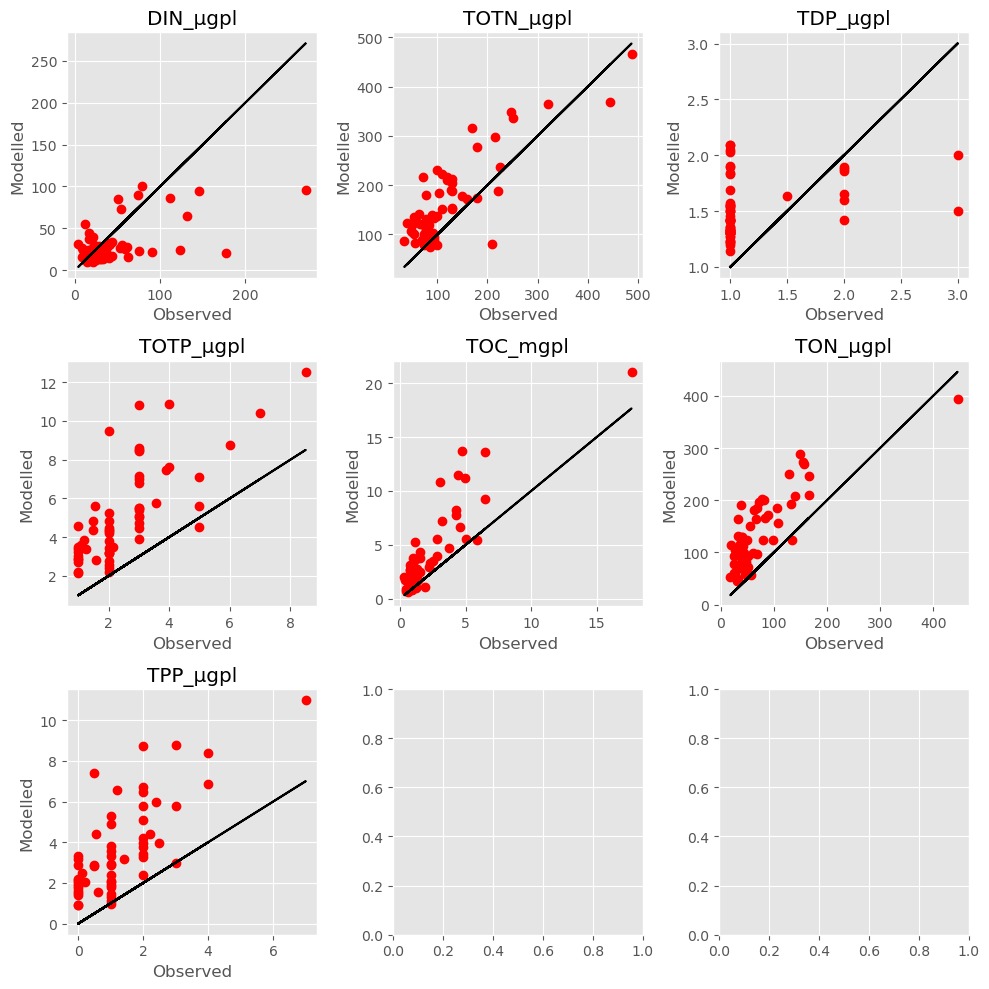

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
axes = axes.flatten()
cols = [col for col in mod_df.columns if col != 'station_id']
for idx, par in enumerate(cols):
    axes[idx].plot(df[f"{par}_obs"], df[f"{par}_mod"], 'ro')
    axes[idx].plot(df[f"{par}_obs"], df[f"{par}_obs"], 'k-')
    axes[idx].set_xlabel('Observed')
    axes[idx].set_ylabel('Modelled')
    axes[idx].set_title(par)
plt.tight_layout()